In [2]:
import pandas as pd



In [3]:
df = pd.read_json('data/datalists/datalist_resized64_all.json')

data = df["data"]

source_name_list = map(lambda x: x["sname"], data)
survey_list = map(lambda x: x["survey"], data)
label_list = map(lambda x: x["label"], data)
telescope_list = map(lambda x: x["telescope"], data)
project_list = map(lambda x: x["project"], data)

metadata = pd.DataFrame()
metadata["source_name"] = list(source_name_list)
metadata["survey"] = list(survey_list)
metadata["label"] = list(label_list)
metadata["telescope"] = list(telescope_list)
metadata["project"] = list(project_list)

#print(metadata.to_string())



#print(list(survey_list))
#print(data.to_string()) 

In [4]:
metadata.describe()


,source_name,survey,label,telescope,project
count,16219,16219,16219,16219,16219
unique,11567,5,5,5,8
top,galaxy0002_obj1,emu,COMPACT,askap,radio-galaxy-zoo-dr1
freq,13,5695,6428,5695,5481


In [5]:
for label in metadata["label"].unique():
    numerosity = metadata[metadata["label"] == label]["label"].count()
    print("Label: {}, Count: {}".format(label, numerosity))

Label: POINT-LIKE, Count: 4436
Label: COMPACT, Count: 6428
Label: EXTENDED, Count: 3361
Label: EXTENDED-MULTISLAND, Count: 1654
Label: DIFFUSE, Count: 340


In [7]:
for label in metadata["survey"].unique():
    numerosity = metadata[metadata["survey"] == label]["survey"].count()
    print("Survey: {}, Count: {}".format(label, numerosity))

Survey: emu, Count: 5695
Survey: mgps, Count: 4856
Survey: first, Count: 5481
Survey: scorpio, Count: 117
Survey: mixed, Count: 70


In [8]:
for label in metadata["telescope"].unique():
    numerosity = metadata[metadata["telescope"] == label]["telescope"].count()
    print("{}: {}".format(label, numerosity))

askap: 5695
meerkat: 4856
vla: 5481
atca: 117
mixed: 70


In [9]:
for label in metadata["project"].unique():
    numerosity = metadata[metadata["project"] == label]["project"].count()
    print("{}: {}".format(label, numerosity))

scorpio-pilot2: 4812
scorpio-pilot1: 505
lband-legacy: 4856
radio-galaxy-zoo-dr1: 5481
scorpio-earlyscience: 337
pilot1: 41
scorpio-2_1GHz: 117
dragns: 70


In [12]:
for label in metadata["survey"].unique():
    project = metadata[metadata["survey"] == label]["project"].unique()
    print(label)
    print(project)
    #print("{}: {}".format(label, numerosity))

emu
['scorpio-pilot2' 'scorpio-pilot1' 'scorpio-earlyscience' 'pilot1']
mgps
['lband-legacy']
first
['radio-galaxy-zoo-dr1']
scorpio
['scorpio-2_1GHz']
mixed
['dragns']


In [13]:
for label in metadata["label"].unique():
    survey = metadata[metadata["label"] == label]["survey"].unique()
    print(label)
    print(survey)
    #print("{}: {}".format(label, numerosity))

POINT-LIKE
['emu']
COMPACT
['emu' 'mgps' 'first']
EXTENDED
['emu' 'scorpio' 'mixed' 'mgps' 'first']
EXTENDED-MULTISLAND
['emu' 'scorpio' 'mixed' 'mgps' 'first']
DIFFUSE
['emu' 'mgps']


In [20]:
for label in metadata["label"].unique():
    surveys = metadata[metadata["label"] == label]["survey"].unique()
    print(label)
    print(surveys)
    for surv in surveys:
        surv_count = metadata[(metadata["label"] == label) & (metadata["survey"] == surv)]["survey"].count()
        print("{}: {}".format(surv, surv_count)) 
    #print("{}: {}".format(label, numerosity))

POINT-LIKE
['emu']
emu: 4436
COMPACT
['emu' 'mgps' 'first']
emu: 443
mgps: 3704
first: 2281
EXTENDED
['emu' 'scorpio' 'mixed' 'mgps' 'first']
emu: 742
scorpio: 110
mixed: 58
mgps: 720
first: 1731
EXTENDED-MULTISLAND
['emu' 'scorpio' 'mixed' 'mgps' 'first']
emu: 59
scorpio: 7
mixed: 12
mgps: 107
first: 1469
DIFFUSE
['emu' 'mgps']
emu: 15
mgps: 325


In [30]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
raw_path = "/home/riggi/Data/MLData/smorph-dataset/data/point-like/askap-emu-pilot2_SB32526/resized64/imgs/S100.fits"
relative_path = raw_path.split()

In [23]:
file_path = "data/point-like/askap-emu-pilot2_SB32526/resized64/imgs/S100.fits"
hdul = fits.open(file_path)
npy_image = hdul[0].data


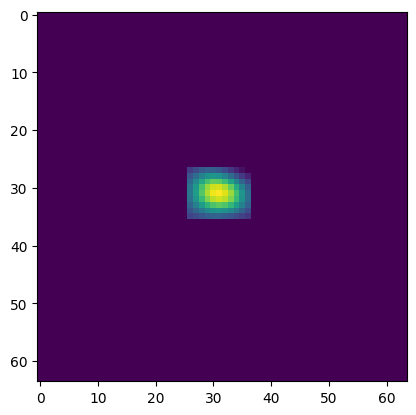

In [28]:
imgplot = plt.imshow(npy_image)

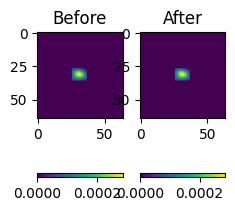

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 5, 1)
imgplot = plt.imshow(npy_image)
ax.set_title('Before')
plt.colorbar(orientation='horizontal')
ax = fig.add_subplot(1, 5, 2)
imgplot = plt.imshow(npy_image)

ax.set_title('After')
plt.colorbar(orientation='horizontal')

In [ ]:
for path in 


fig = plt.figure()
ax = fig.add_subplot(1, 5, 1)
imgplot = plt.imshow(npy_image)
ax.set_title('Before')
plt.colorbar(orientation='horizontal')
ax = fig.add_subplot(1, 5, 2)
imgplot = plt.imshow(npy_image)

ax.set_title('After')
plt.colorbar(orientation='horizontal')